**Tropical Cyclone Freddy**


**How did Pangu-AI-forecast perform on predicting Freddy using ERA5-data as a comparison?**

**Aim of this document**
- show the differences in the storm danger evaluation between Pangu and ERA using differenceplots

**Import libraries**

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import xarray as xr
from datetime import datetime
import sys
import warnings
from glob import glob
import netCDF4 as nc
import h5netcdf
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.dates import DateFormatter, HourLocator
import datetime as dt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", message=".*invalid value encountered in intersects.*")

**Load the data**

In [2]:
## ERA5
era =  xr.open_dataset('../data//processed/ERA_processed_TC_Freddy.nc')

# Pangu
pangu = xr.open_dataset("../data/processed/Pangu_processed_TC_Freddy.nc")

**Load plotting functions**

In [3]:
%run ../functions/plot_functions.ipynb

**Define ranges and colors for plotting**

In [24]:
# Ranges of variables for discrete legends
u_levels = np.arange(0,27,3)
msl_levels = np.arange(980,1020,5)
q_levels = np.arange(0,0.008,0.0004)
tp_levels = np.arange(0,0.015,0.003)
u_levels_contour = np.linspace(0,30,9)

u_diff_levels = np.linspace(-13.5,13.5,8)
u_diff_levels = u_diff_levels[u_diff_levels != 0]

msl_diff_levels = np.arange(-20,20,5)

q_diff_levels = np.linspace(-4, 4, 8)
q_diff_levels = q_diff_levels[q_diff_levels != 0]
q_diff_levels = np.round(q_diff_levels, 4)

# Color schemes
colors_q = ['lightcyan', 'lightblue', 'lightskyblue', 'deepskyblue', 'dodgerblue', 'royalblue',"blue", 'mediumblue']
q_cmap = colors.LinearSegmentedColormap.from_list('colors_q', colors_q, N=8)

colors_wind_speeds = ['white', 'lightcyan','lightblue', 'gold', 'orange', 'orangered', 'red', 'firebrick']
wind_speed_cmap = colors.LinearSegmentedColormap.from_list('wind_speed_cmap', colors_wind_speeds, N=8) #color map


colors_bwr = ['#000033', '#87CEEB', '#0000FF', '#FFD700', '#FFA500', '#FF4500', '#FF0000', '#8B0000']
bwr_cmap = colors.LinearSegmentedColormap.from_list('differences', colors_bwr, N=8) #color map
bwr_cmap = plt.cm.get_cmap('bwr', 7)

/var/folders/hb/mgpzl1hd2kl8yb2pfv5nlzq80000gp/T/ipykernel_3792/2028500511.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  bwr_cmap = plt.cm.get_cmap('bwr', 7)


**Differenceplots** Methodology

1. extract the pangu file with the right initialisation and right time step
2. extract the era file with the right time and date 
3. create a substraction xarray with all variables of that time
4. plot the variables (differences)

In [4]:
# extract the pangu file with the right initialisation and right time step
# 21.02 18:00; init 19.02; bad init 14.02
pangu_2102_1800 = pangu.sel(step = pangu.step[8],
                            time = "2023-02-19T12:00:00.000000000")
pangu_2102_1800_bad = pangu.sel(step = pangu.step[28],
                                time = "2023-02-14T12:00:00.000000000")

# 24.02 18:00; init 23.02; bad init 19.02
pangu_2402_1800 = pangu.sel(step = pangu.step[4],
                            time = "2023-02-23T12:00:00.000000000")
pangu_2402_1800_bad = pangu.sel(step = pangu.step[20],
                                time = "2023-02-19T12:00:00.000000000")

In [5]:
# extract the era file with the right time and date
# 21.02 18:00
era_2102_1800 = era.sel(time = "2023-02-21T18:00:00.000000000")

# 24.02 18:00
era_2402_1800 = era.sel(time = "2023-02-24T18:00:00.000000000")

In [6]:
# for this we need matching coordinates
# lets rename era because we have less datasets there
era_2102_1800 = era_2102_1800.rename({"lat":"latitude", "lon":"longitude", "level":"isobaricInhPa"})
era_2402_1800 = era_2402_1800.rename({"lat":"latitude", "lon":"longitude", "level":"isobaricInhPa"})


In [7]:
# create a substraction xarray with all variables of that time
diff_2102 = era_2102_1800 - pangu_2102_1800
diff_2102_bad = era_2102_1800 - pangu_2102_1800_bad

diff_2402 = era_2402_1800 - pangu_2402_1800
diff_2402_bad = era_2402_1800 - pangu_2402_1800_bad

In [9]:
diff_2102

<xarray.Dataset> Size: 940kB
Dimensions:            (longitude: 161, latitude: 81, isobaricInhPa: 2)
Coordinates:
  * longitude          (longitude) float32 644B 25.0 25.25 25.5 ... 64.75 65.0
  * latitude           (latitude) float64 648B -30.0 -29.75 ... -10.25 -10.0
  * isobaricInhPa      (isobaricInhPa) int32 8B 850 500
    step               timedelta64[ns] 8B 2 days 06:00:00
    valid_time         datetime64[ns] 8B ...
    meanSea            float64 8B ...
    heightAboveGround  float64 8B ...
Data variables:
    u10                (latitude, longitude) float64 104kB 0.124 ... -0.8624
    v10                (latitude, longitude) float64 104kB 0.0107 ... 1.411
    msl                (latitude, longitude) float64 104kB -0.2042 ... 0.1053
    u                  (isobaricInhPa, latitude, longitude) float32 104kB -0....
    v                  (isobaricInhPa, latitude, longitude) float32 104kB -0....
    z                  (isobaricInhPa, latitude, longitude) float32 104kB -10...
    q                  (isobaricInhPa, latitude, longitude) float32 104kB -0....
    wind_speed         (isobaricInhPa, latitude, longitude) float32 104kB -1....
    wind_speed_sfc     (latitude, longitude) float64 104kB 0.1175 ... 1.641

**Plot the differences** - wind speed (500 hPa) and m


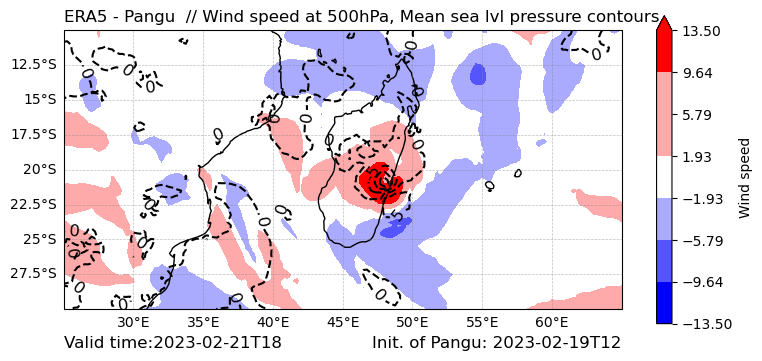

In [27]:
diff_contourfPA_contour(data = diff_2102, #the whole dataset
                        contourf_var = diff_2102.wind_speed, #base variable
                        contour_var = diff_2102.msl,  #overlaying variable !only surface processes
                        init_pangu = "2023-02-19T12",    #initialisation of pangu as a string like "2023-02-23T12"
                        pressure = 1,     #pressure lvl (500 == 1/850 == 0)
                        contourf_lvl = u_diff_levels, #base variable range 
                        contour_lvl = msl_diff_levels,  #overlaying variable range
                        legend_colormap = bwr_cmap, #color scheme as a map
                        legend_title = "Wind speed",    #variable name for legend
                        contour_var_name = "Mean sea lvl pressure" #name of the second variable for plot text
                            )

**Plot the differences** - specific humidity and surface wind speeds

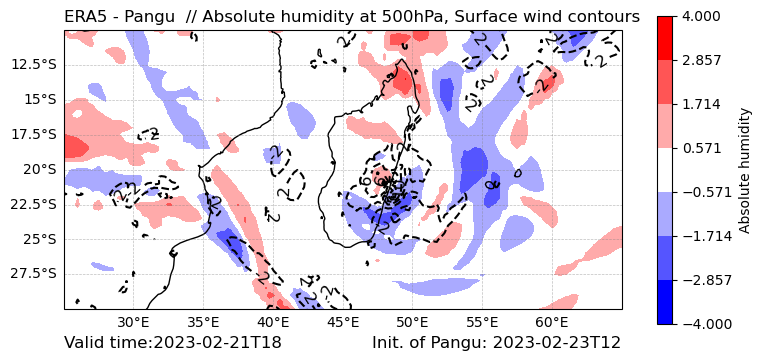

In [26]:
diff_contourfPA_contour(data = diff_2102, #the whole dataset
                        contourf_var = diff_2102.q, #base variable
                        contour_var = diff_2102.wind_speed_sfc,  #overlaying variable !only surface processes
                        init_pangu = "2023-02-23T12",    #initialisation of pangu as a string like "2023-02-23T12"
                        pressure = 1,     #pressure lvl (500 == 1/850 == 0)
                        contourf_lvl = q_diff_levels, #base variable range 
                        contour_lvl = u_diff_levels,  #overlaying variable range
                        legend_colormap = bwr_cmap, #color scheme as a map
                        legend_title = "Absolute humidity",    #variable name for legend
                        contour_var_name = "Surface wind" #name of the second variable for plot text
                            )